In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from data_science.linear_discriminant_analysis import colors

In [6]:
[[random.randint(1, 400) for _ in range(2)] for _ in range(50)]

[[218, 268],
 [136, 399],
 [232, 176],
 [179, 284],
 [392, 391],
 [116, 224],
 [236, 159],
 [212, 293],
 [25, 257],
 [123, 81],
 [242, 312],
 [79, 161],
 [282, 219],
 [308, 47],
 [68, 303],
 [105, 111],
 [101, 234],
 [319, 309],
 [395, 165],
 [301, 387],
 [338, 119],
 [364, 270],
 [17, 196],
 [221, 247],
 [364, 317],
 [308, 92],
 [394, 30],
 [338, 4],
 [271, 244],
 [316, 118],
 [175, 294],
 [49, 339],
 [381, 265],
 [27, 164],
 [98, 107],
 [114, 318],
 [310, 40],
 [228, 288],
 [12, 2],
 [298, 342],
 [96, 251],
 [367, 126],
 [162, 23],
 [284, 133],
 [149, 31],
 [25, 223],
 [124, 27],
 [306, 31],
 [123, 51],
 [358, 71]]

In [7]:
data_1 = np.array([[random.randint(1, 400) for _ in range(2)] for _ in range(50)], dtype=np.float64)
data_2 = np.array([[random.randint(300, 700) for _ in range(2)] for _ in range(50)], dtype=np.float64)
data_3 = np.array([[random.randint(600, 900) for _ in range(2)] for _ in range(50)], dtype=np.float64)

In [8]:
data = np.vstack((data_1, data_2, data_3))

In [11]:
data.shape

(150, 2)

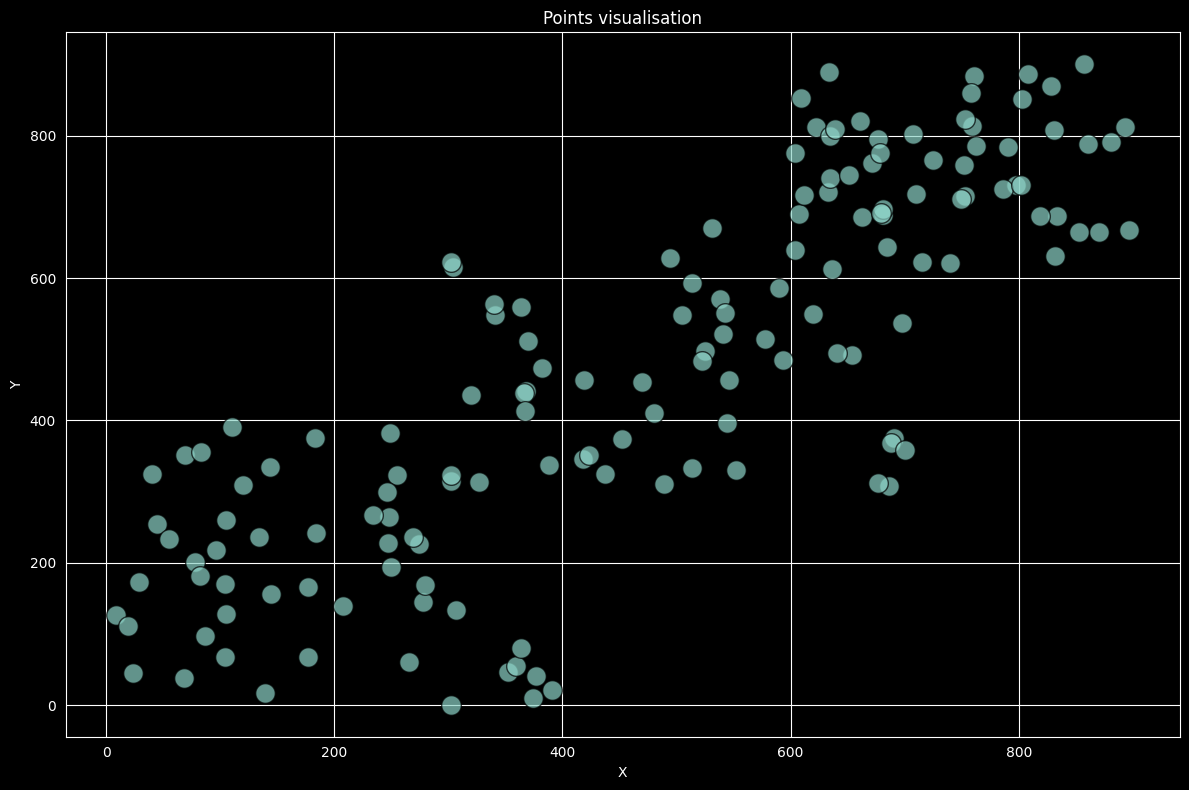

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(data[:, 0], data[:, 1], s=200, alpha=0.7, edgecolors='k')
ax.set_title('Points visualisation')
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.tight_layout()

plt.show()

In [17]:
labels = np.repeat([0, 1, 2], repeats=50)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
labels.shape

(150,)

In [21]:
df = pd.DataFrame({
    'data_x': data[:, 0],
    'data_y': data[:, 1],
    'label': labels
})
df.sample(10)

,data_x,data_y,label
24,55.0,233.0,0
56,691.0,376.0,1
1,45.0,254.0,0
145,831.0,808.0,2
96,700.0,359.0,1
90,514.0,593.0,1
102,803.0,852.0,2
109,671.0,761.0,2
54,663.0,685.0,1
108,633.0,721.0,2


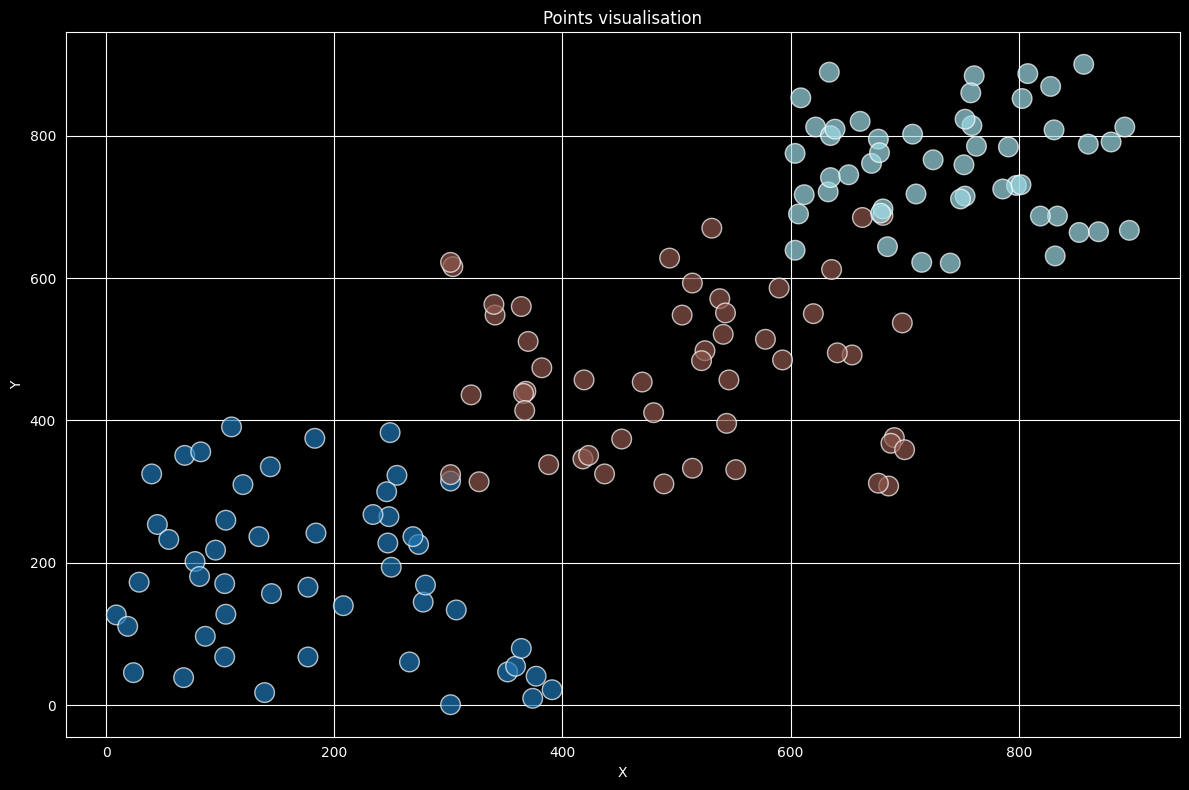

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))

# colors = ['green', 'blue', 'purple']

ax.scatter(df['data_x'], df['data_y'], s=200, alpha=0.7, edgecolors='w', c=df['label'], cmap='tab20')
ax.set_title('Points visualisation')
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.tight_layout()

plt.show()